### Part 3: Downstream Global Health Analysis
#### Q1: Research question 

Among the following papers, identify a research question
they address that you could explore using the TweetsCOV19 dataset. For example, set out
to analyze sentiments towards Covid-19 as a function of time or geographical location, or of
any sub-topic related to the pandemic. Motivate the relevance of your question in the context
of the pandemic. Feel free to use another peer-reviewed paper analyzing COVID tweets for
public health insights for inspiration. Ensure to provide a correct citation.

Looking at the paper "Comparing tweet sentiments in megacities using machine learning techniques: In the midst of COVID-19" by Zhirui Yao et al. , we would like to analyze Tweet sentiments during the Covid-19 pandemic as a function of time per city. This topic is of great relevance both for politics and research in psychology. Both these fields seek to predict how crowds behave under certain stresses, such as fear, which is especially useful to understand for politicians in order to adapt or present decisions according to the current sentiment present for instance. Furthermore, such analyses might help to enhance predictive capabilities of institutions in order to adapt their communication in situations of hight alertness of crowds such that panicking or chaos may be prevented. Additionally, this analyses may also provide different sentiments and compliance to measures in different cities, which may be useful to understand the effectiveness of certain measures in different cities.

#### Q2: Method choice and design
 Among the methods you have explored in Part 2,
select one approach to tackle this research question using the TweetsCOV19 dataset and
motivate your choice. Detail any necessary modifications you implement to achieve this
analysis and performance metrics to measure the success of your approach. Provide a code
snippet used to perform this analysis.


As the method of choice, in order to analyze the sentiment of the Tweets we would like to use the VADER sentiment analysis tool. This tool is specifically designed to analyze social media texts and is therefore well suited for our task. Furthermore, we already used this tool and had good experiences with it in the previous questions in terms of that sentiment analysis was performed well. Additionally, one can point out that the VADER tool is already fimiliar with a large corpus of social media texts, which is why it is not necessary to train the model on our dataset. What is more, VADER provides robust classification results irrespective of the length of the text, which is why it is well suited for our task and nearly no pre-processing needs to be done beforehand except for the removal of NaN values.

In the following you can see the code snippet used to perform the necessary modifications and the sentiment analysis on the TweetsCOV19 dataset. 

In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data= pd.read_csv('./data/TweetsCOV19.csv')

#Removal of NaN's
new_data = raw_data[raw_data['TweetText'].notna()]
text_data = new_data['TweetText']

C:\Users\chris\AppData\Local\Temp\ipykernel_9960\4260082755.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data= pd.read_csv('./data/TweetsCOV19.csv')


How to measure the success of our approach? (could make comparison to Paper vs. our results)

I don't know what to do here, maybe you have an idea? Kein Bock mehr diese scheiss labels zu includen, I refuse to do this :(

In [3]:
#Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
sentiment = text_data.apply(lambda x: analyzer.polarity_scores(x))
sentiment_df = pd.DataFrame(sentiment.tolist())

In [4]:
# add date column
sentiment_df['TweetDate'] = new_data['Timestamp'].values

#add user location column
sentiment_df['UserLocation'] = new_data['UserLocation'].values

# remove time form TweetDate column
sentiment_df['TweetDate'] = sentiment_df['TweetDate'].apply(lambda x: x.split(' ')[0])

# remove pos neg neu columns
sentiment_df.drop(['pos', 'neg', 'neu'], axis=1, inplace=True)



In [5]:
# save sentiment_df to csv
sentiment_df.to_csv('./data/sentiment.csv', index=False)

#show sentiment_df
sentiment_df.head(10)

,compound,TweetDate,UserLocation
0,0.4019,2019-09-30,"Los Angeles, CA"
1,0.1280,2019-09-30,United Kingdom
2,0.4215,2019-09-30,Las Vegas
3,-0.3612,2019-09-30,irl
4,0.0000,2019-09-30,"Beijing, China"
5,0.4199,2019-09-30,"Wilmington, NC"
6,-0.0258,2019-09-30,Jupiter
7,-0.6808,2019-10-01,Hong Kong
8,0.6369,2019-10-01,"Baltimore, MD"
9,0.0000,2019-10-01,"California, USA"


### Q3: Results & Analysis
Analyze your results and provide numerical evaluation and
visualizations showcasing your findings. 

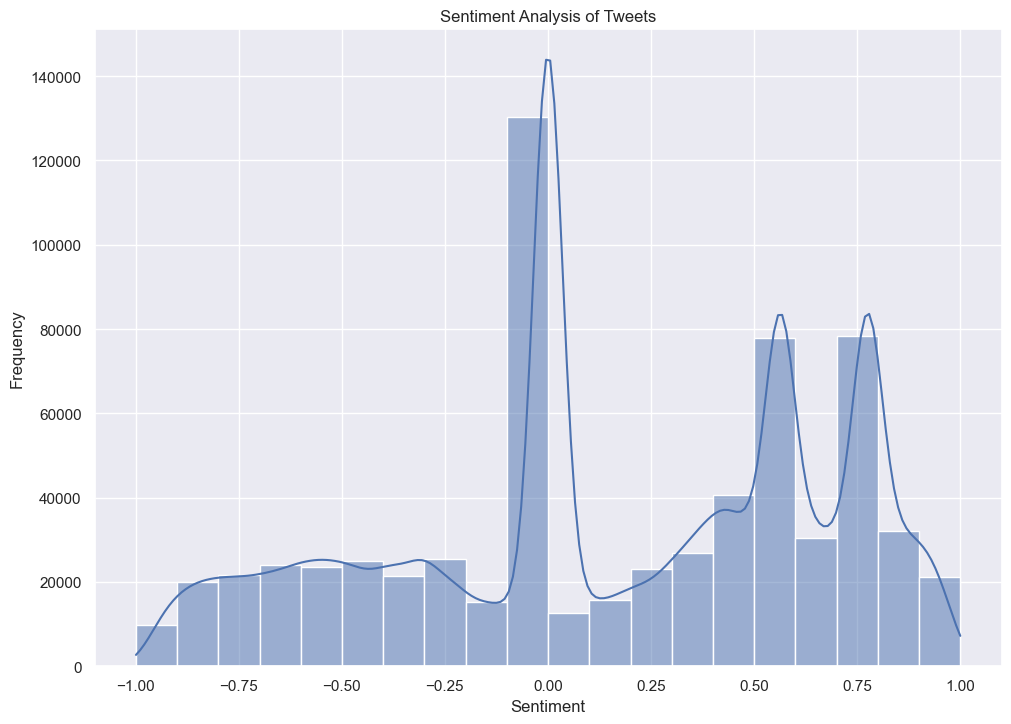

In [2]:
sentiment_df= pd.read_csv('./data/sentiment.csv')
#visualize the sentiment distribution
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(sentiment_df['compound'], bins=20, kde=True)
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [3]:
# load sentiment_df
sentiment_df = pd.read_csv('./data/sentiment.csv')

# group by user location and then by date and make mean of compound
grouped = sentiment_df.groupby(['UserLocation', 'TweetDate']).mean()

# get user locations of grouped Chicago, New York, Los Angeles, Washington, London, Boston, Singapore, Rome, Seattle
locations = ['Chicago', 'New York', 'Los Angeles', 'Washington', 'London', 'Boston', 'Singapore', 'Rome', 'Seattle']

new_grouped_locations = grouped.loc[locations]

Sentiment per city for whole time period available in Covid-19 dataset

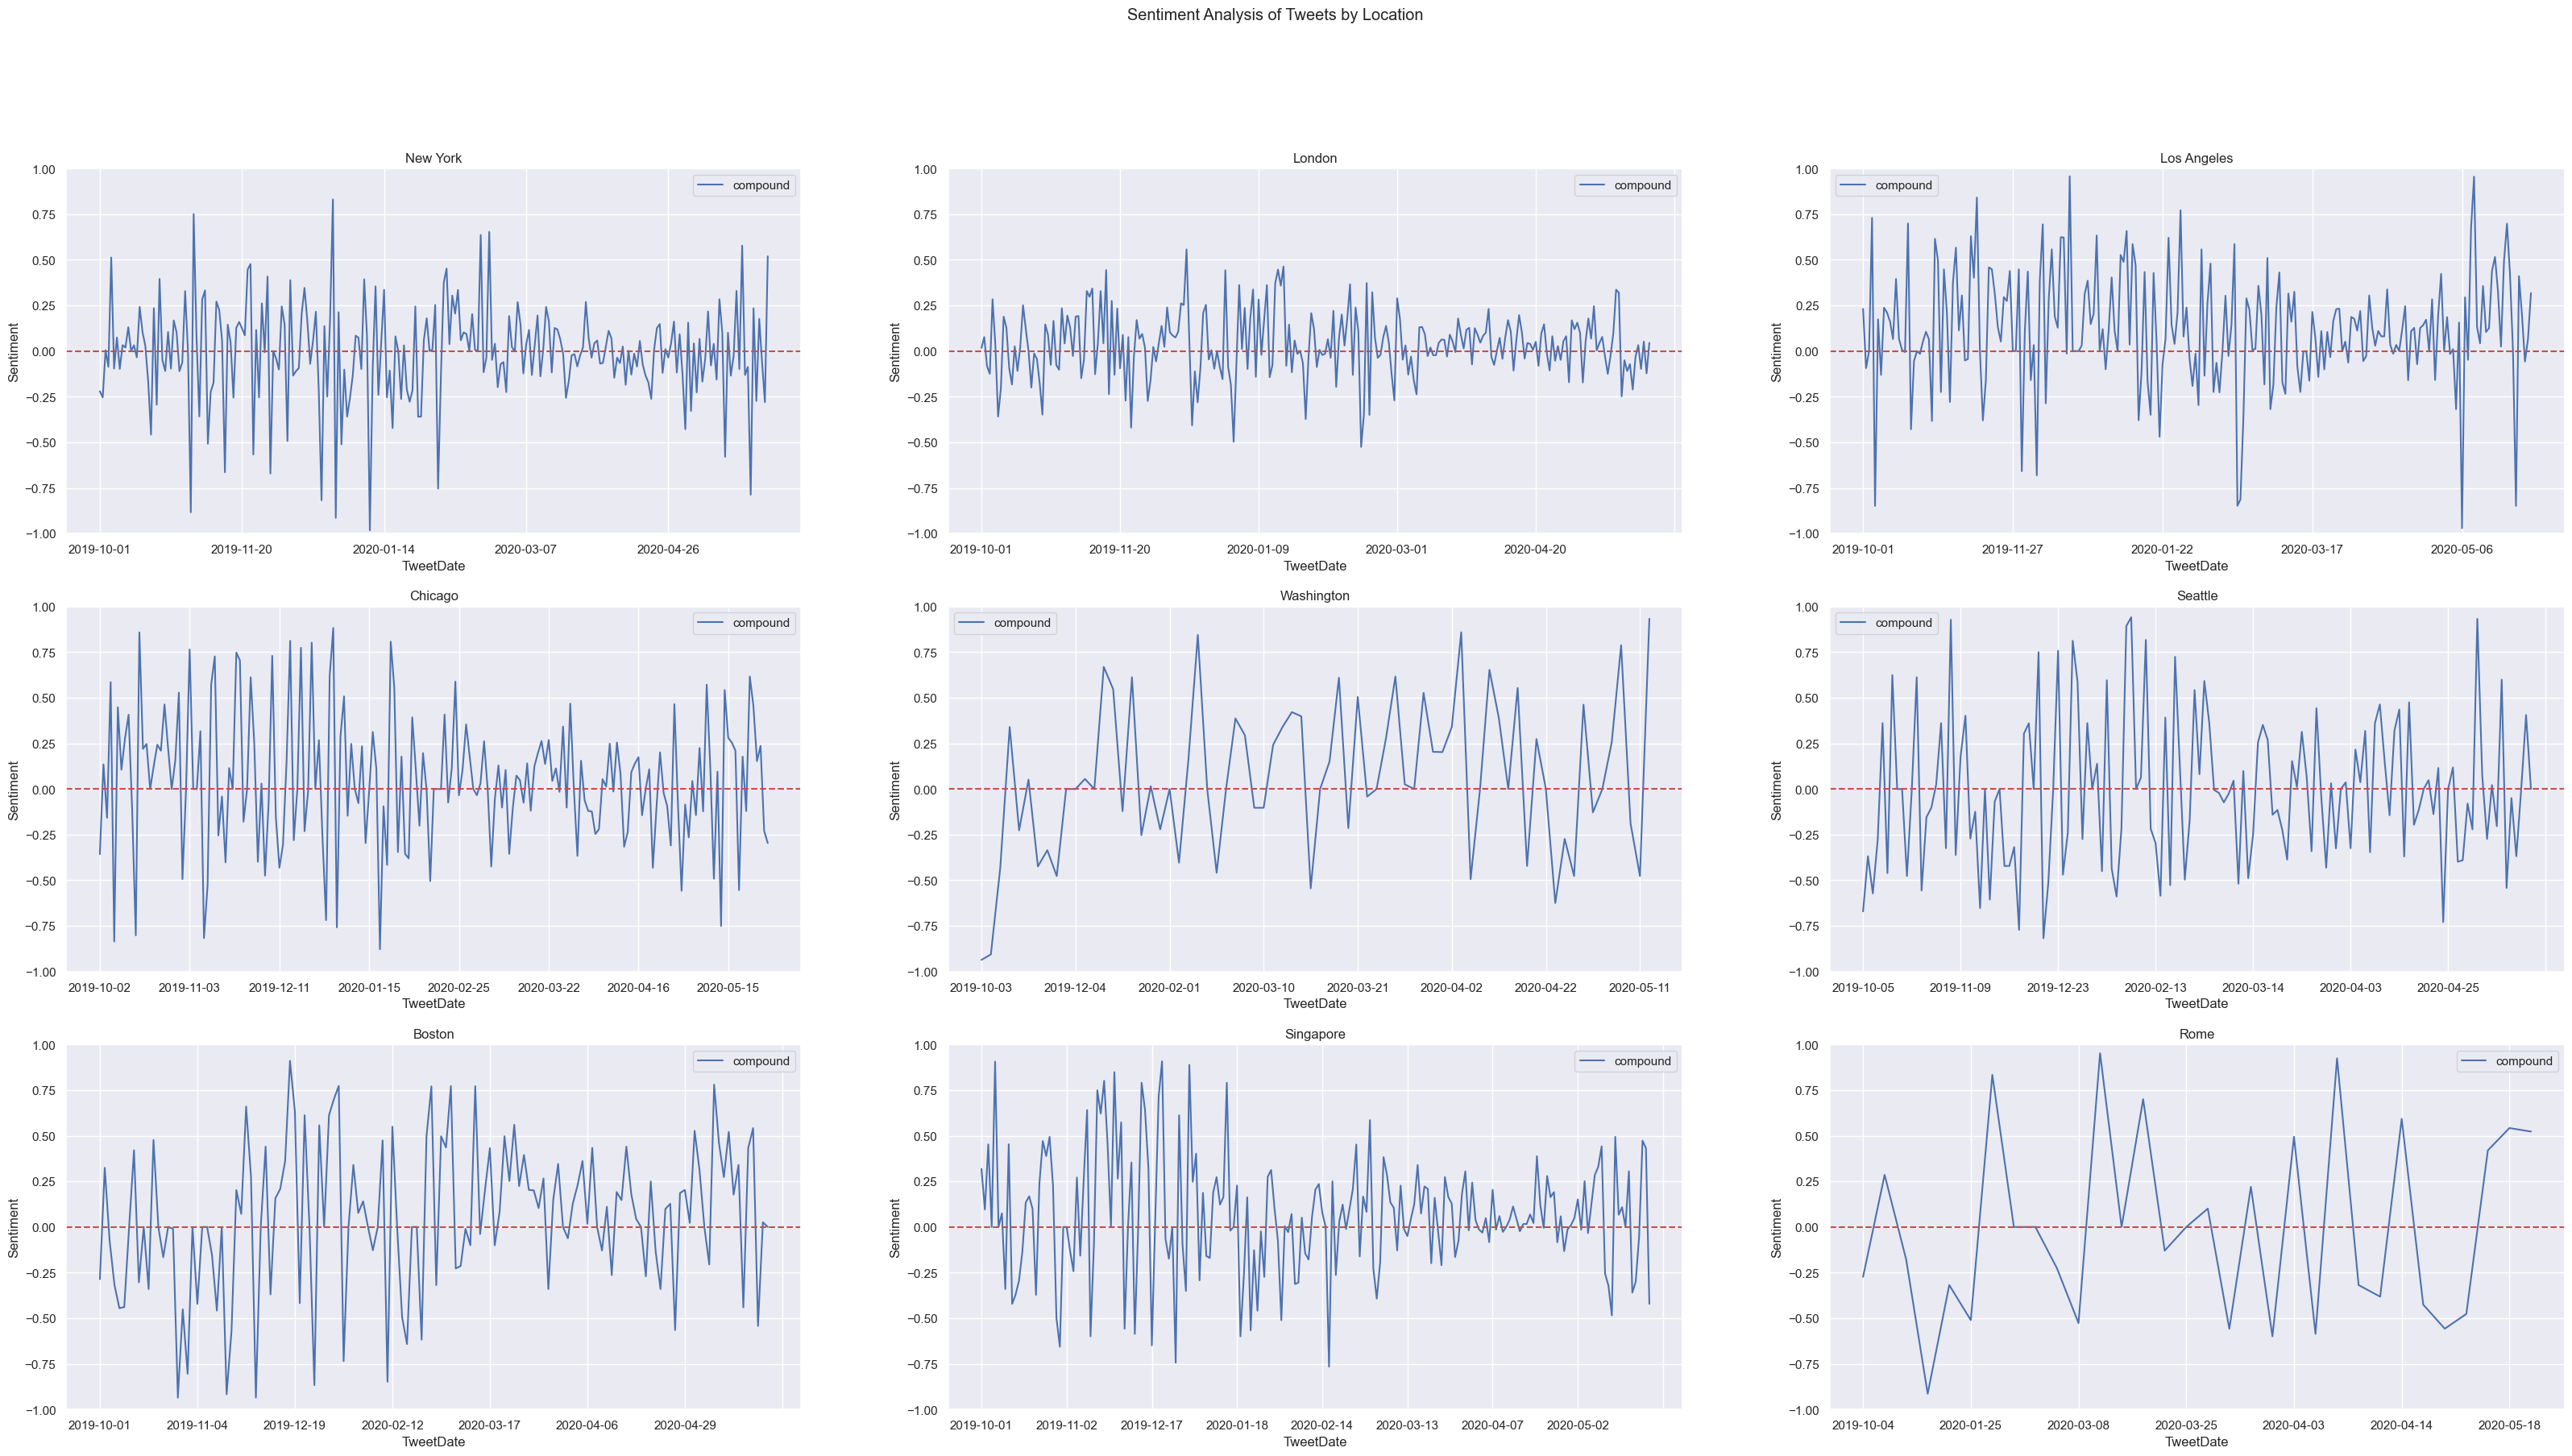

In [4]:
# make each a sub plot of all sentiments for each location and set x axis to date

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 20))
fig.suptitle('Sentiment Analysis of Tweets by Location')
new_grouped_locations.loc['New York'].plot(ax=axes[0,0], title='New York')
new_grouped_locations.loc['London'].plot(ax=axes[0,1], title='London')
new_grouped_locations.loc['Los Angeles'].plot(ax=axes[0,2], title='Los Angeles')
new_grouped_locations.loc['Chicago'].plot(ax=axes[1,0], title='Chicago')
new_grouped_locations.loc['Washington'].plot(ax=axes[1,1], title='Washington')
new_grouped_locations.loc['Seattle'].plot(ax=axes[1,2], title='Seattle')
new_grouped_locations.loc['Boston'].plot(ax=axes[2,0], title='Boston')
new_grouped_locations.loc['Singapore'].plot(ax=axes[2,1], title='Singapore')
new_grouped_locations.loc['Rome'].plot(ax=axes[2,2], title='Rome')

# y axis is sentiment with range -1 to 1
for ax in axes.flat:
    ax.set(ylabel='Sentiment', ylim=(-1, 1))
    
# make red dotted line at 0
for ax in axes.flat:
    ax.axhline(y=0, color='r', linestyle='--')
       
plt.show()

what kind of numerical evaluation should I provide here?

In [ ]:
#sth numerical evaluation

Explain what conclusions can be drawn from
these, as well as key takeaways which answer (or partially answer) your research question

Looking at our first plot, one can clearly see that the overall sentiment has a maximum frequency roughly around the neutral sentiment. This is surprising because our data is collected using COVID 19 related topics and one would expect that the overall sentiment is rather negative. Moreover, one can see that the overall sentiment is rather positive than negative, due to two high peaks with clearly positive compound values which is also surprising. However, one can see that the overall sentiment is rather close to neutral, which is why we can conclude that the overall sentiment is rather neutral. 

Looking our second plot, we can observe wild fluctuations in the sentiment compound score over time for the different cities. However, one can see that the sentiment compound score is rather close to neutral for all cities, which is why we can conclude that the overall sentiment is rather neutral for all cities. Furthermore, one can see that the sentiment compound score is rather close to neutral for all cities, which is why we can conclude that the overall sentiment is rather neutral for all cities.


Can see differences across the different cities in terms of variance of sentiment over time

### Plot and analyze the sentiment of the Tweets as a function of time per city

In [6]:
# load sentiment_df
sentiment_df = pd.read_csv('./data/sentiment.csv')

# group by user location and then by date and make mean of compound
grouped = sentiment_df.groupby(['UserLocation', 'TweetDate']).mean()

# get user locations of grouped Chicago, New York, Los Angeles, Washington, London, Boston, Singapore, Rome, Seattle
locations = ['Chicago', 'New York', 'Los Angeles', 'Washington', 'London', 'Boston', 'Singapore', 'Rome', 'Seattle']

new_grouped_locations = grouped.loc[locations]


In [7]:
new_grouped_locations.head(10)

compound
UserLocation TweetDate           
Chicago      2019-10-02 -0.356450
             2019-10-03  0.134800
             2019-10-04 -0.157300
             2019-10-05  0.585900
             2019-10-07 -0.835300
             2019-10-08  0.448450
             2019-10-10  0.105750
             2019-10-11  0.277700
             2019-10-12  0.407200
             2019-10-13 -0.118667

### Plots for date between 2020-03-01 and 2020-05-21

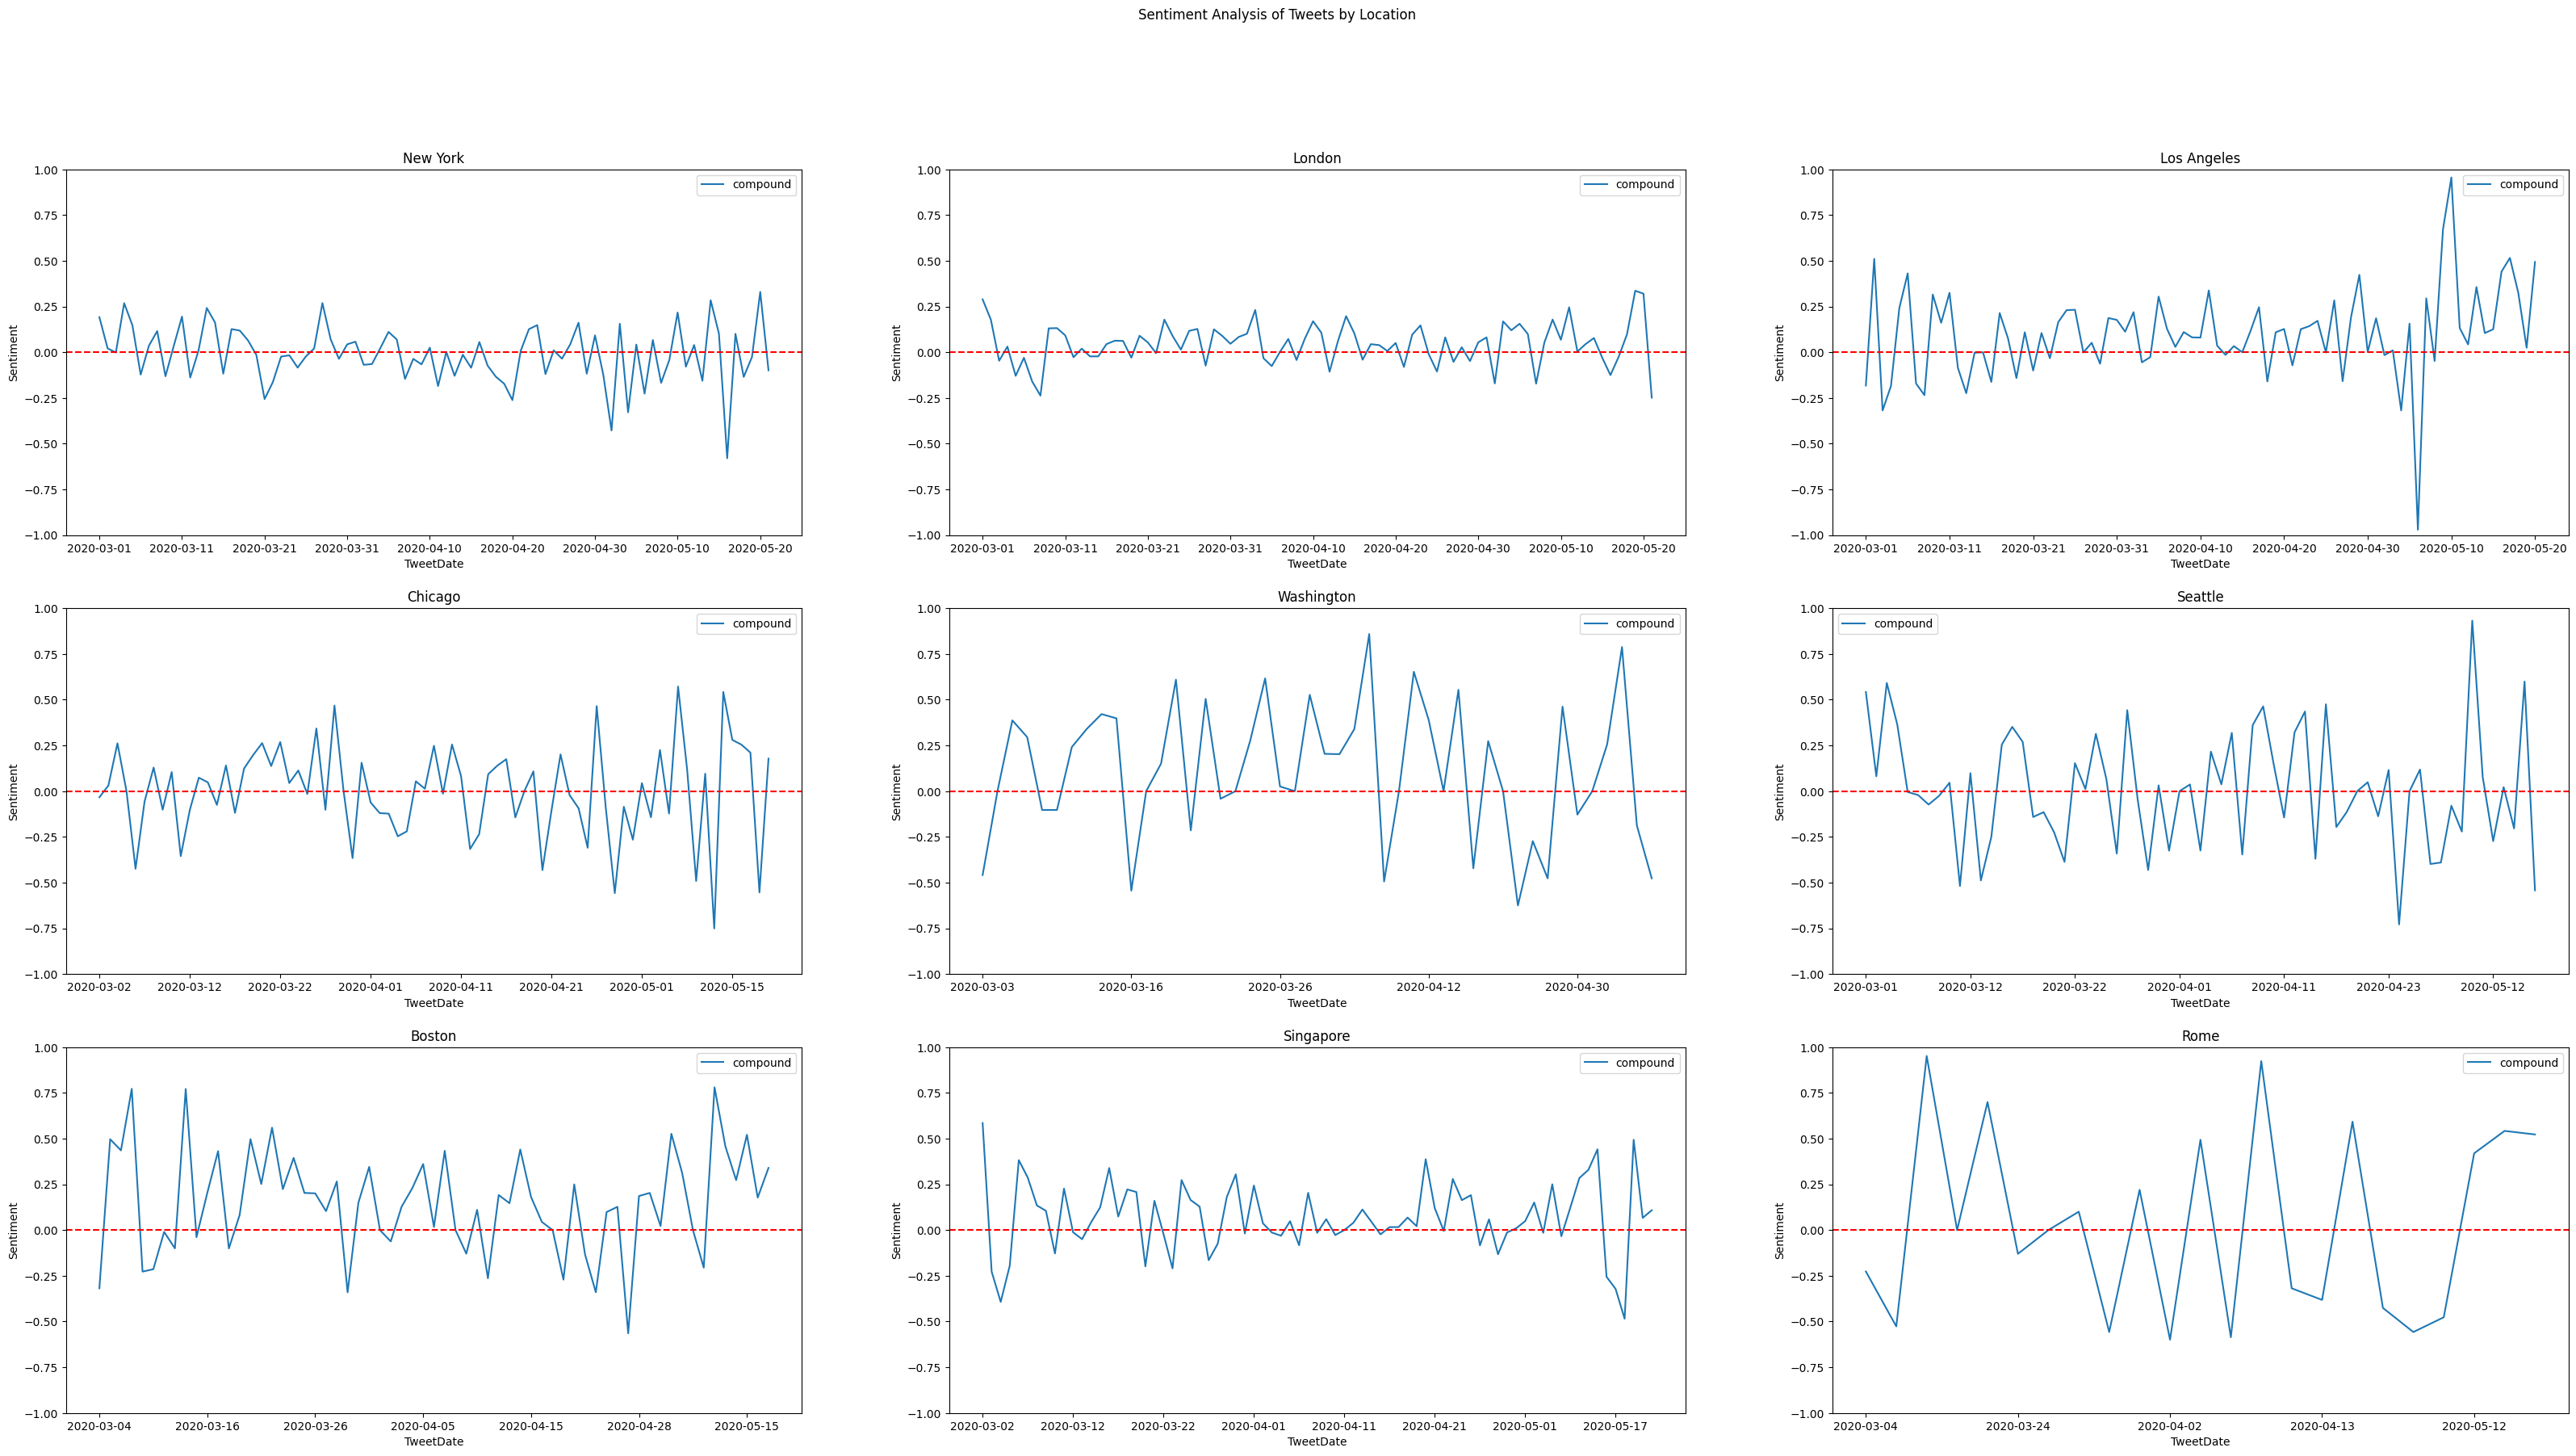

In [8]:
# get values between 2020-03-01 and 2020-05-21
new_grouped_locations = new_grouped_locations.loc[(new_grouped_locations.index.get_level_values('TweetDate') >= '2020-03-01') & (new_grouped_locations.index.get_level_values('TweetDate') <= '2020-05-21')]

# make each a sub plot of all sentiments for each location and set x axis to date

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(40, 20))
fig.suptitle('Sentiment Analysis of Tweets by Location')
new_grouped_locations.loc['New York'].plot(ax=axes[0,0], title='New York')
new_grouped_locations.loc['London'].plot(ax=axes[0,1], title='London')
new_grouped_locations.loc['Los Angeles'].plot(ax=axes[0,2], title='Los Angeles')
new_grouped_locations.loc['Chicago'].plot(ax=axes[1,0], title='Chicago')
new_grouped_locations.loc['Washington'].plot(ax=axes[1,1], title='Washington')
new_grouped_locations.loc['Seattle'].plot(ax=axes[1,2], title='Seattle')
new_grouped_locations.loc['Boston'].plot(ax=axes[2,0], title='Boston')
new_grouped_locations.loc['Singapore'].plot(ax=axes[2,1], title='Singapore')
new_grouped_locations.loc['Rome'].plot(ax=axes[2,2], title='Rome')

# y axis is sentiment with range -1 to 1
for ax in axes.flat:
    ax.set(ylabel='Sentiment', ylim=(-1, 1))
    
# make red dotted line at 0
for ax in axes.flat:
    ax.axhline(y=0, color='r', linestyle='--')
       
plt.show()

### Q4: Comparison to literature
Discuss whether your results support or disagree
with the paper you have chosen for inspiration. Provide plausible reasons for different
findings or any performance discrepancies

### Q5: Discussion
Discuss the pros and cons of your approach compared to the one
used in the paper

### Q6: Summary & Conclusion 
 Provide a summary of your analysis and the insights it
provides about your research question